In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
df=pd.read_csv('dataset10.tsv', sep='\t')
df

,subject,predicate,object
0,Alice,likes,Bob
1,Alice,knows,Eve
2,Alice,has,Cat
3,Bob,likes,Alice
4,Bob,has,Dog
5,Charlie,knows,Alice
6,Charlie,likes,Eve
7,David,has,Fish
8,David,knows,Bob
9,Eve,likes,Fish


In [21]:

from pykeen.triples import TriplesFactory

# Assuming your dataframe has columns 'subject', 'predicate', 'object'
triples_factory = TriplesFactory.from_labeled_triples(
    triples=df[['subject', 'predicate', 'object']].values,
)
triples_factory.triples

array([['Alice', 'has', 'Cat'],
       ['Alice', 'knows', 'Eve'],
       ['Alice', 'likes', 'Bob'],
       ['Bob', 'has', 'Dog'],
       ['Bob', 'likes', 'Alice'],
       ['Charlie', 'knows', 'Alice'],
       ['Charlie', 'likes', 'Eve'],
       ['David', 'has', 'Fish'],
       ['David', 'knows', 'Bob'],
       ['Eve', 'likes', 'Fish']], dtype='<U7')

INFO:pykeen.pipeline.api:Using device: None
Training epochs on cpu: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:23<00:00,  8.56epoch/s, loss=0.119, prev_loss=0]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10.0/10.0 [00:00<00:00, 300triple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No

Hits@1: 1.0
Hits@3: 1.0
Hits@5: 1.0
Hits@10: 1.0
Mean Reciprocal Rank: 1.0


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

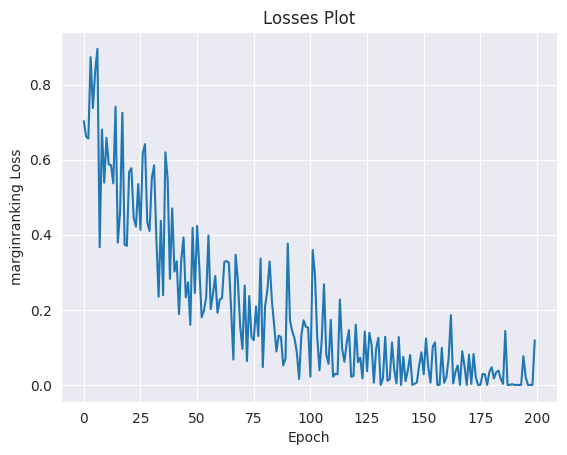

In [29]:
from pykeen.pipeline import pipeline
training = triples_factory
validation = triples_factory
testing = triples_factory

result = pipeline(
    model='RotatE',
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=3),  # Increase the embedding dimension
    optimizer_kwargs=dict(lr=0.01),  # Adjust the learning rate
    training_kwargs=dict(num_epochs=200, use_tqdm_batch=False),  # Increase the number of epochs
)

# The trained model is stored in the pipeline result
model = result.model

from pykeen.evaluation import RankBasedEvaluator

# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")
result.plot_losses()